# Importing relevant libraries

In [155]:
import anvil.server

anvil.server.connect("KGMNNCYDBL3SF7DUCGOJG2O4-KT44R7C3HFWDQDIW")


Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


In [1]:
#libraries for dataframes and linear algebra & maths
import numpy as np
import pandas as pd
import math

In [2]:
#I need to read files from my local computer directories
import sys
import os
from os import listdir

In [3]:
#deeplearning and machine learning libraries

import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, Input, load_model
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import backend as K
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array


In [4]:
#for visual effects and plotting, counters
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
import cv2

# Reading and loading data from local machine

In [6]:
#defining glob vars for data
data = []
data_dir = "/Users/deshdeepak/ironhack/final_project/PlantVillage-Dataset/raw/color/"
train_dir = os.path.join(data_dir)
print(train_dir)

/Users/deshdeepak/ironhack/final_project/PlantVillage-Dataset/raw/color/


In [7]:
labels = []
for directory in os.listdir(train_dir):
  labels.append(directory)
print(labels)
print(str(len(labels)) + " classes")

['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Target_Spot', 'Peach___healthy', 'Potato___Late_blight', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Leaf_Mold', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Cedar_apple_rust', 'Tomato___Bacterial_spot', 'Grape___healthy', 'Tomato___Early_blight', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___healthy', 'Cherry_(including_sour)___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Apple_scab', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Squash___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___B

In [8]:
# function to convert images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size) #gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [10]:
train_data = []
try:
    #print("[INFO] Loading images ...")
    #root_dir = listdir()
    for directory in train_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            train_dir.remove(directory)


    for defects_id, sp in enumerate(labels):
        for file in os.listdir(os.path.join(train_dir, sp)):
            train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")        
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train

[INFO] Image loading completed


,File,DiseaseID,Disease Type
0,Strawberry___healthy/8f558908-aa1b-4a86-855a-5...,0,Strawberry___healthy
1,Strawberry___healthy/b8e9ed27-8e37-4214-9206-f...,0,Strawberry___healthy
2,Strawberry___healthy/abdd34a0-ab02-41e0-95a3-a...,0,Strawberry___healthy
3,Strawberry___healthy/d1aee44a-b6bb-45b9-b7b6-5...,0,Strawberry___healthy
4,Strawberry___healthy/3d28c3ea-8419-4e09-addd-2...,0,Strawberry___healthy
...,...,...,...
54300,Soybean___healthy/57c18b39-2a33-471f-91eb-a9ba...,37,Soybean___healthy
54301,Soybean___healthy/4fdc663e-a8ea-4d8a-801b-ef18...,37,Soybean___healthy
54302,Soybean___healthy/df807f13-078b-4a6a-9c23-e43e...,37,Soybean___healthy
54303,Soybean___healthy/60bf9858-951a-4b56-906e-3c1b...,37,Soybean___healthy


In [11]:
len(train_data)

54305

In [12]:
#reshuffling the sample as DiseaseID was sorted by 0....37
train = train.sample(frac=1, random_state=42) 
train.index = np.arange(len(train)) # Resetting index
train

,File,DiseaseID,Disease Type
0,Tomato___Late_blight/4fd803b3-c615-4d9e-9bee-5...,8,Tomato___Late_blight
1,Apple___healthy/8d45fcf9-d1c1-47b6-be37-6e3d2f...,34,Apple___healthy
2,Tomato___Tomato_Yellow_Leaf_Curl_Virus/8026acb...,24,Tomato___Tomato_Yellow_Leaf_Curl_Virus
3,Tomato___Septoria_leaf_spot/69624cd3-6e0a-4853...,30,Tomato___Septoria_leaf_spot
4,Strawberry___Leaf_scorch/ee921a9c-1761-4859-85...,35,Strawberry___Leaf_scorch
...,...,...,...
54300,"Pepper,_bell___healthy/c6dfe386-62c3-464d-8815...",10,"Pepper,_bell___healthy"
54301,Squash___Powdery_mildew/65483846-0b08-4a10-b45...,31,Squash___Powdery_mildew
54302,Tomato___Spider_mites Two-spotted_spider_mite/...,27,Tomato___Spider_mites Two-spotted_spider_mite
54303,Grape___Black_rot/6dc433e2-eb64-4e1d-8a79-12c5...,1,Grape___Black_rot


In [14]:
train['DiseaseID'].value_counts() #36 types of disease

11    5507
24    5357
37    5090
28    2297
16    2127
8     1909
31    1835
30    1771
27    1676
34    1645
22    1591
3     1502
10    1478
5     1404
20    1383
19    1192
1     1180
4     1162
35    1109
13    1076
14    1052
7     1000
2     1000
18    1000
29     997
26     985
12     952
23     854
25     630
33     621
32     513
0      456
17     423
9      373
21     371
6      360
15     275
36     152
Name: DiseaseID, dtype: int64

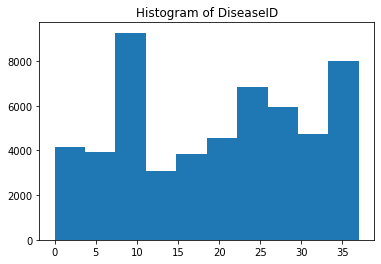

<Figure size 1080x1080 with 0 Axes>

In [15]:
plt.hist(train['DiseaseID'])
plt.title('Histogram of DiseaseID')
plt.figure(figsize=(15, 15))
plt.show()

In [16]:
#defining image helpers

def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath)) 
# Loading a color image is the default flag

#resize image to target size

def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

## Train-Test split

In [17]:
imagesize = 64

X_train = np.zeros((train.shape[0], imagesize, imagesize, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (imagesize, imagesize))


54305it [03:02, 297.05it/s]


In [18]:

display(X_train[0])
display(X_train[0].shape)

array([[[ 99., 104., 125.],
        [ 99., 104., 125.],
        [ 93.,  98., 119.],
        ...,
        [155., 158., 173.],
        [158., 161., 176.],
        [156., 159., 174.]],

       [[ 97., 102., 123.],
        [ 97., 102., 123.],
        [ 99., 104., 125.],
        ...,
        [159., 162., 177.],
        [158., 161., 176.],
        [156., 159., 174.]],

       [[ 91.,  96., 117.],
        [101., 106., 127.],
        [ 96., 101., 122.],
        ...,
        [155., 158., 173.],
        [161., 164., 179.],
        [158., 161., 176.]],

       ...,

       [[ 93.,  99., 118.],
        [ 98., 104., 123.],
        [107., 113., 132.],
        ...,
        [165., 172., 189.],
        [164., 171., 188.],
        [167., 174., 191.]],

       [[101., 107., 126.],
        [ 99., 105., 124.],
        [103., 109., 128.],
        ...,
        [166., 173., 190.],
        [165., 172., 189.],
        [161., 168., 185.]],

       [[104., 110., 129.],
        [104., 110., 129.],
        [108., 1

(64, 64, 3)

In [19]:
# Normalize the data
X_train_norm = X_train / 255 
print('Train Shape: {}'.format(X_train_norm.shape))

Train Shape: (54305, 64, 64, 3)


In [20]:
# Flatten the images. Images are to be input as vector
X_train_fl_no = X_train_norm.reshape((-1, 4096))
print('Train Shape: {}'.format(X_train_fl_no.shape))
#test_images = test_images.reshape((-1, 784))

Train Shape: (162915, 4096)


In [21]:
Y_train = train['DiseaseID'].values
Y_train_labels = to_categorical(Y_train) #encoding into array with values-- 1 and 0

In [22]:
Y_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
Y_train_labels.shape

(54305, 38)

In [24]:
# Normalize the data
Y_train_norm = (Y_train_labels/255)
#Y_train = Y_train_labels.reshape((-1, 784))


In [25]:
Y_train_norm.shape

(54305, 38)

In [26]:
X_train.shape

(54305, 64, 64, 3)

In [27]:
Y_train.shape

(54305,)

In [28]:
# Split the train and validation sets 
X_train, X_test, Y_train, Y_test = train_test_split(X_train_norm, Y_train_labels, test_size=0.2, random_state=42)

# Modeling with Keras

In [29]:
INPUT_SHAPE = (64, 64, 3)
def modeling():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', 
                     input_shape=INPUT_SHAPE),
        BatchNormalization(axis=1),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu', 
                     input_shape=INPUT_SHAPE),
        BatchNormalization(axis=1),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu', 
                     input_shape=INPUT_SHAPE),
        BatchNormalization(axis=1),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, kernel_size=(3, 3), activation='relu', 
                     input_shape=INPUT_SHAPE),
        BatchNormalization(axis=1),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(38, activation='softmax')
])

    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    model.summary()
    return model

In [30]:
modeling().summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        248       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 64)        116       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        3

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x15c8ec430>>

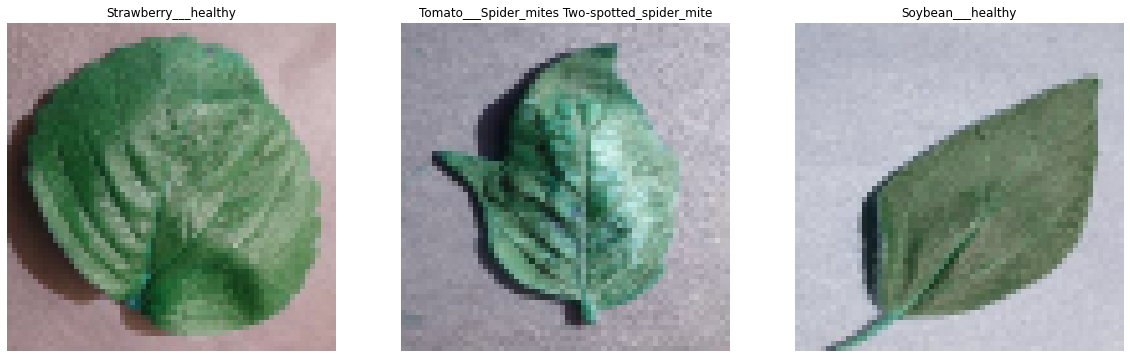

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(20,20))
for i in range(3):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(labels[np.argmax(Y_train[i])])

In [32]:
modelc = modeling()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 62, 62, 32)        248       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 29, 29, 64)        116       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)       

In [33]:
X_train.shape


(43444, 64, 64, 3)

In [34]:
Y_train.shape

(43444, 38)

In [35]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")



In [36]:
checkpointc = ModelCheckpoint('my-color-model-checkpoint.h5', verbose=1, save_best_only=True)
reduce_LRP = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)

In [37]:
len(X_train) // 64 
#checking steps_per_epoch,using // to get integer instead of float value through /

678

In [43]:
historyc = modelc.fit(
    aug.flow(X_train, Y_train, batch_size=64),
    validation_data=(X_test, Y_test),
    steps_per_epoch=len(X_train) // 64,
    epochs=20, verbose=1,
    callbacks=[reduce_LRP, checkpointc]
    )

Epoch 1/20
678/678 [==============================] - 548s 776ms/step - loss: 2.6305 - accuracy: 0.3108 - val_loss: 1.1918 - val_accuracy: 0.6526

Epoch 00001: val_loss improved from inf to 1.19181, saving model to my-color-model-checkpoint.h5
Epoch 2/20
678/678 [==============================] - 514s 758ms/step - loss: 1.3282 - accuracy: 0.6110 - val_loss: 0.8959 - val_accuracy: 0.7240

Epoch 00002: val_loss improved from 1.19181 to 0.89592, saving model to my-color-model-checkpoint.h5
Epoch 3/20
678/678 [==============================] - 600s 884ms/step - loss: 1.0283 - accuracy: 0.6867 - val_loss: 0.8916 - val_accuracy: 0.7215

Epoch 00003: val_loss improved from 0.89592 to 0.89158, saving model to my-color-model-checkpoint.h5
Epoch 4/20
678/678 [==============================] - 504s 742ms/step - loss: 0.8608 - accuracy: 0.7319 - val_loss: 0.6904 - val_accuracy: 0.7781

Epoch 00004: val_loss improved from 0.89158 to 0.69038, saving model to my-color-model-checkpoint.h5
Epoch 5/20
6

In [44]:
#for first iteration with historyc
final_loss, final_accuracy = modelc.evaluate(X_test, Y_test)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

340/340 [==============================] - 38s 110ms/step - loss: 0.2553 - accuracy: 0.9126
Final Loss: 0.2553296685218811, Final Accuracy: 0.9126231670379639


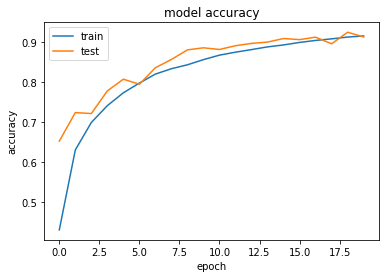

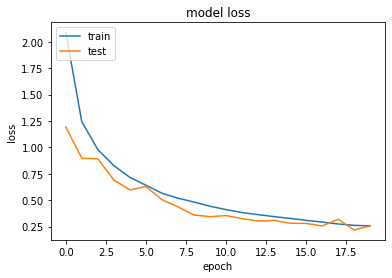

In [184]:
#for first iteration with historyc
#accuracy plot for epoch = 30
plt.plot(historyc.history['accuracy'])
plt.plot(historyc.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#loss plot for epoch = 30
plt.plot(historyc.history['loss'])
plt.plot(historyc.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(0.5, 255.29374999999993, 'Predicted')

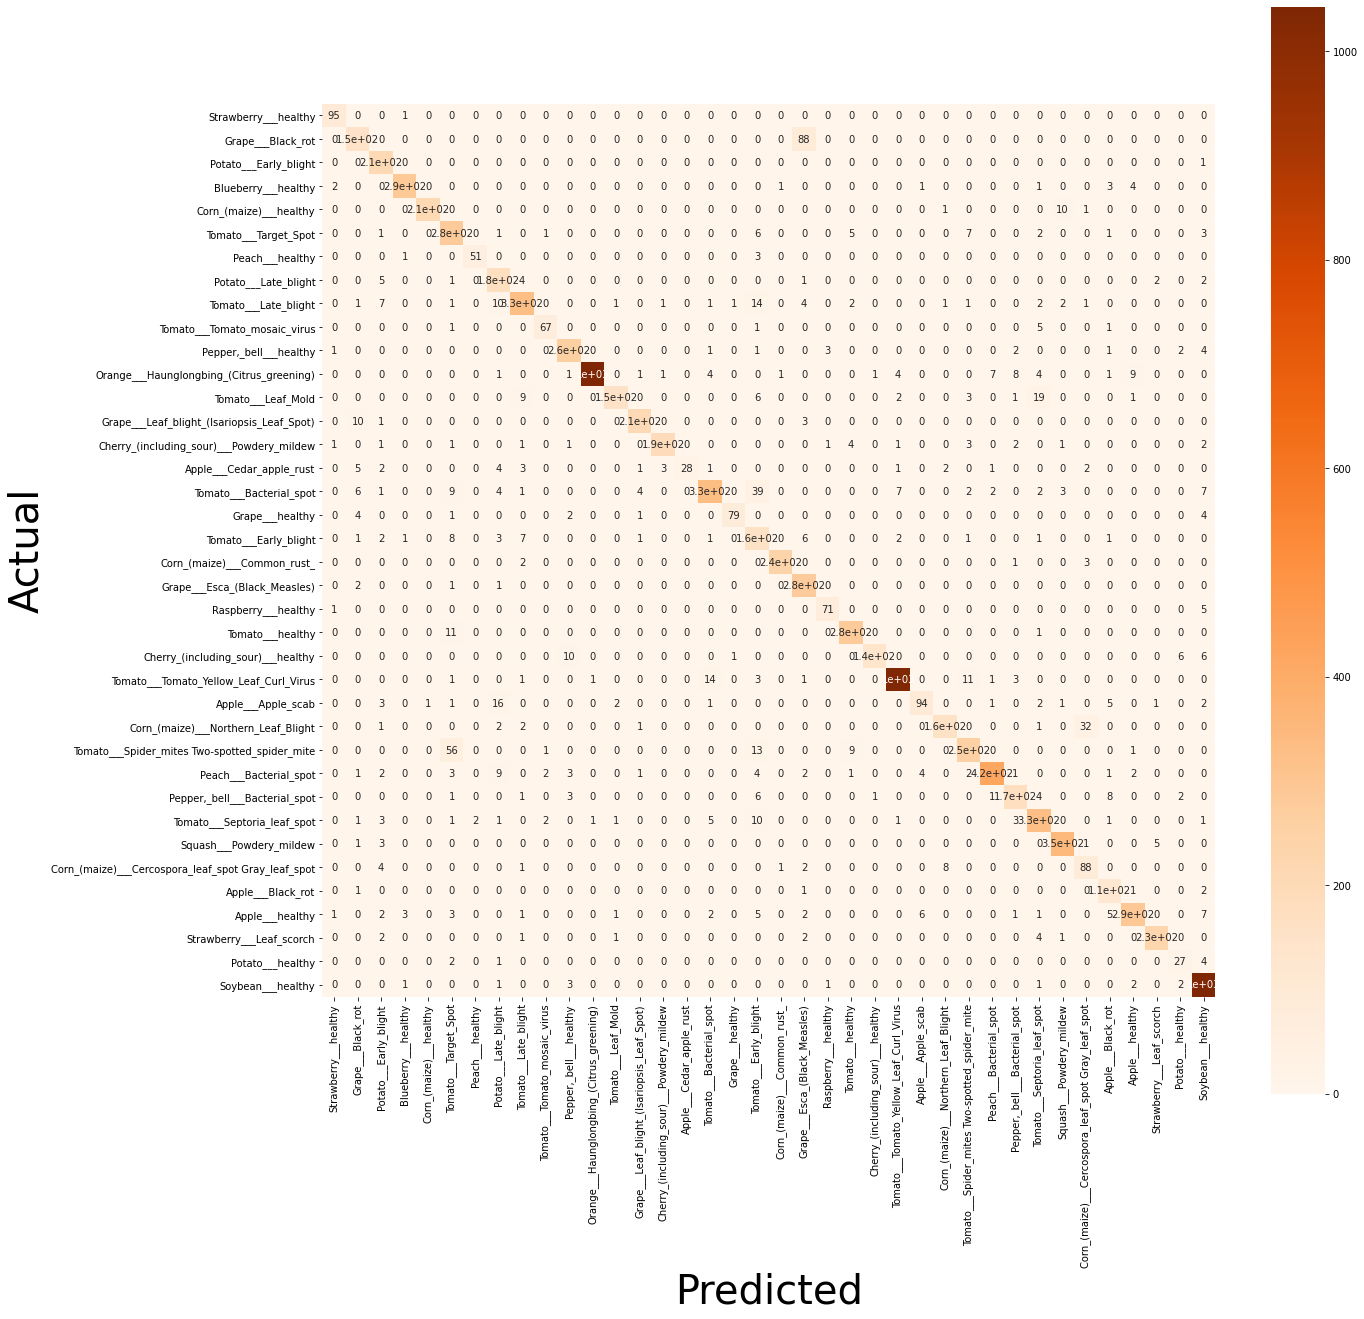

In [49]:
#for first iteration with history
Y_pred = modelc.predict(X_test)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)
import seaborn as sns
cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(20, 20))
ax = sns.heatmap(cm, cmap=plt.cm.Oranges, annot=True, square=True, xticklabels=labels, yticklabels=labels)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [50]:
#for first iteration
test=X_train[100]
test=test.reshape((-1,64,64,3))
predictions = modelc.predict(test)
print("Prediction: "+ labels[np.argmax(predictions)])
print("Result: " + labels[np.argmax(Y_train[100])])

Prediction: Strawberry___Leaf_scorch
Result: Strawberry___Leaf_scorch


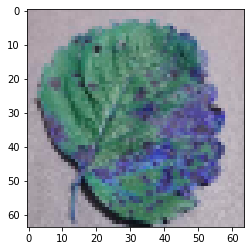

In [51]:
plt.imshow(X_train[100])

In [53]:
#for first iteration
test=X_train[5]
test=test.reshape((-1,64,64,3))
predictions = modelc.predict(test)
print("Prediction: "+ labels[np.argmax(predictions)])
print("Result: " + labels[np.argmax(Y_train[5])])

Prediction: Tomato___Early_blight
Result: Tomato___Late_blight


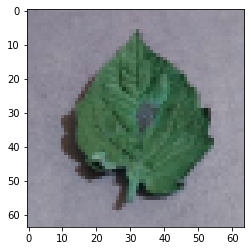

In [54]:
plt.imshow(X_train[5])

In [55]:
#for first iteration
test=X_train[8]
test=test.reshape((-1,64,64,3))
predictions = modelc.predict(test)
print("Prediction: "+ labels[np.argmax(predictions)])
print("Result: " + labels[np.argmax(Y_train[8])])

Prediction: Blueberry___healthy
Result: Blueberry___healthy


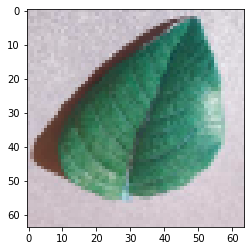

In [56]:
plt.imshow(X_train[8])

In [66]:
from keras.models import load_model
model = load_model('my-color-model-checkpoint.h5')

In [71]:
default_image_size = tuple((64, 64))

In [176]:
def predict_disease(image_path):
    default_image_size = tuple((64, 64))
    image_array = convert_image_to_array(image_path)
    np_image = np.array(image_array, dtype=np.float32)
    print(np_image.dtype)
    np_image = np.expand_dims(np_image,0)
    print(np_image.shape)
    test=np_image.reshape((-1,64,64,3))
    plt.imshow(plt.imread(image_path))
    np_image_norm = np_image/255.0 
    result = model.predict_classes(np_image) 
    print(result)
    list_result = list(result)
    loc = list_result[0]
    print("Prediction1: "+ labels[loc])
    print("Prediction from model1: " + labels[np.argmax((Y_test[loc]))])
    #print("Result: " + labels[np.argmax(Y_train[100])])
    #print(np.argmax(result))
    

In [174]:
model.evaluate(
  X_test,
    Y_test
)

340/340 [==============================] - 83s 244ms/step - loss: 0.2181 - accuracy: 0.9245


[0.21808630228042603, 0.9245005249977112]

float32
(1, 64, 64, 3)
[33]
Prediction1: Apple___Black_rot
Prediction from model1: Corn_(maize)___Common_rust_
0


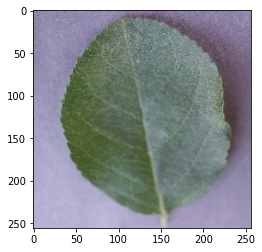

In [175]:
predict_disease('/Users/deshdeepak/Applehealthy.JPG')

float32
(1, 64, 64, 3)
[10]
Prediction1: Pepper,_bell___healthy
Prediction from model1: Tomato___Bacterial_spot


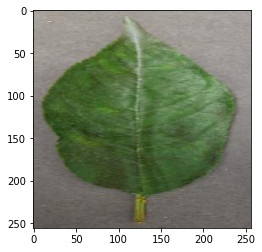

In [177]:
predict_disease('/Users/deshdeepak/Cherrymildew.JPG')

float32
(1, 64, 64, 3)
[10]
Prediction1: Pepper,_bell___healthy
Prediction from model1: Tomato___Bacterial_spot


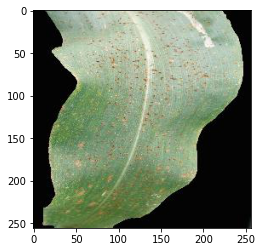

In [178]:
predict_disease('/Users/deshdeepak/CornCommonrust.JPG')

float32
(1, 64, 64, 3)
[4]
Prediction1: Corn_(maize)___healthy
Prediction from model1: Blueberry___healthy


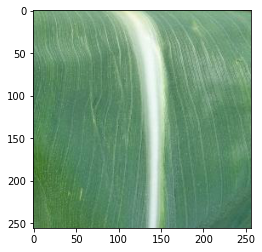

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/server.py", line 311, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/server.py", line 303, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/_threaded_server.py", line 404, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/Python.framework/Versions/3.9/lib/python3.9/threading.py", line 954, in _bootstrap_inner
    self.run()
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/Py

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/server.py", line 311, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/server.py", line 303, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/_threaded_server.py", line 404, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/Python.framework/Versions/3.9/lib/python3.9/threading.py", line 954, in _bootstrap_inner
    self.run()
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/P

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/server.py", line 311, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/server.py", line 303, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/_threaded_server.py", line 404, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/Python.framework/Versions/3.9/lib/python3.9/threading.py", line 954, in _bootstrap_inner
    self.run()
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/P

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


Exception in thread Thread-16:
Traceback (most recent call last):
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/server.py", line 311, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/server.py", line 303, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/_threaded_server.py", line 404, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/Python.framework/Versions/3.9/lib/python3.9/threading.py", line 954, in _bootstrap_inner
    self.run()
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/P

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


Exception in thread Thread-19:
Traceback (most recent call last):
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/server.py", line 311, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/server.py", line 303, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/_threaded_server.py", line 404, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/Python.framework/Versions/3.9/lib/python3.9/threading.py", line 954, in _bootstrap_inner
    self.run()
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/P

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


Exception in thread Thread-22:
Traceback (most recent call last):
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/server.py", line 311, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/server.py", line 303, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/_threaded_server.py", line 404, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/Python.framework/Versions/3.9/lib/python3.9/threading.py", line 954, in _bootstrap_inner
    self.run()
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/P

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


Exception in thread Thread-25:
Traceback (most recent call last):
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/server.py", line 311, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/server.py", line 303, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/_threaded_server.py", line 404, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/Python.framework/Versions/3.9/lib/python3.9/threading.py", line 954, in _bootstrap_inner
    self.run()
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/P

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


Exception in thread Thread-28:
Traceback (most recent call last):
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/server.py", line 311, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/server.py", line 303, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/anvil/_threaded_server.py", line 404, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/Python.framework/Versions/3.9/lib/python3.9/threading.py", line 954, in _bootstrap_inner
    self.run()
  File "/usr/local/Cellar/python@3.9/3.9.5/Frameworks/P

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


In [188]:
predict_disease('/Users/deshdeepak/Cornhealthy.JPG')

float32
(1, 64, 64, 3)
[33]
Prediction: Apple___Black_rot


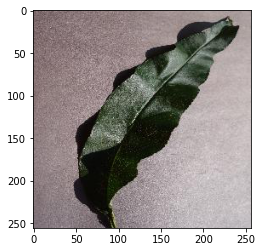

In [144]:
predict_disease('/Users/deshdeepak/Peachhealthy1.JPG')

float32
(1, 64, 64, 3)
[33]
Prediction1: Apple___Black_rot
Prediction from model1: Corn_(maize)___Common_rust_


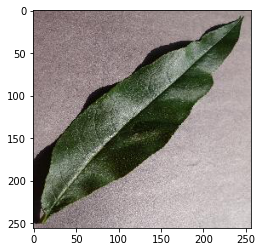

In [180]:
predict_disease('/Users/deshdeepak/Peachhealthy2.JPG')

float32
(1, 64, 64, 3)
[10]
Prediction1: Pepper,_bell___healthy
Prediction from model1: Tomato___Bacterial_spot


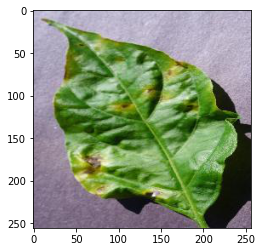

In [181]:
predict_disease('/Users/deshdeepak/PepperbellBS1.JPG')

float32
(1, 64, 64, 3)
[29]
Prediction1: Pepper,_bell___Bacterial_spot
Prediction from model1: Grape___healthy


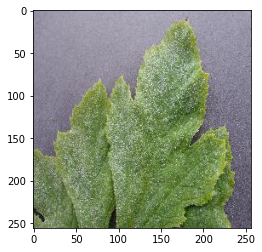

In [182]:
predict_disease('/Users/deshdeepak/Squashmildew1.JPG')

float32
(1, 64, 64, 3)
[10]
Prediction1: Pepper,_bell___healthy
Prediction from model1: Tomato___Bacterial_spot


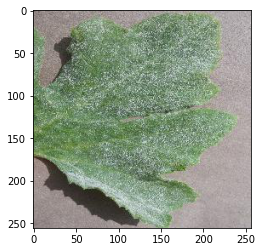

In [183]:
predict_disease('/Users/deshdeepak/Squashmildew2.JPG')

In [185]:
import anvil.server
anvil.server.connect("KGMNNCYDBL3SF7DUCGOJG2O4-KT44R7C3HFWDQDIW")

In [169]:
import anvil.media
@anvil.server.callable
def return_predictions(file):
    with anvil.media.TempFile(file) as filename:
        img = load_img(filename)
        default_image_size = tuple((64, 64))
        image_array = convert_image_to_array(image_path)
        np_image = np.array(image_array, dtype=np.float32)
        print(np_image.dtype)
        np_image = np.expand_dims(np_image,0)
        print(np_image.shape)
        plt.imshow(plt.imread(image_path))
        result = model.predict_classes(np_image) 
        print(result)
        list_result = list(result)
        loc = list_result[0]
        #print("Prediction: "+ labels[loc])
        predicted_disease = labels[np.argmax((Y_test[loc]))]
        print("Prediction from model1: ")
        return predicted_disease
        